# CIFAR100 - Categorical Classification
> # Convolutional Neural Network

In [1]:
import warnings
warnings.filterwarnings('ignore')

* import Tensorflow

In [2]:
import tensorflow

tensorflow.__version__

'2.5.0'

# I. CIFAR100 Data_Set Load

In [3]:
from tensorflow.keras.datasets import cifar100

(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode = 'fine')

In [4]:
X_train.shape

(50000, 32, 32, 3)

# II. Data Preprocessing

> ## 1) Reshape and Normalization

* reshape

In [5]:
X_train = X_train.reshape((50000,  32, 32, 3))
X_test = X_test.reshape((10000,  32, 32, 3))

* Normalization

In [6]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

> ## 2) One Hot Encoding

In [7]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
y_train.shape

(50000, 100)

# III. MNIST Keras Modeling

> ## 1) Model Define

In [9]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(units=256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=100, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 128)         147584    
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               8

> ## 2) Model Compile

* 모델 학습방법 설정

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy',
             metrics=['accuracy'])

> ## 3) Model Fit

* 약 5분

In [12]:
%%time

Hist_mnist = model.fit(X_train, y_train, 
                      batch_size=128, epochs=100,
                      validation_split=0.2)

Epoch 1/100
313/313 [==============================] - 8s 16ms/step - loss: 4.2367 - accuracy: 0.0526 - val_loss: 3.7289 - val_accuracy: 0.1326
Epoch 2/100
313/313 [==============================] - 4s 14ms/step - loss: 3.6647 - accuracy: 0.1383 - val_loss: 3.3070 - val_accuracy: 0.2054
Epoch 3/100
313/313 [==============================] - 5s 15ms/step - loss: 3.3389 - accuracy: 0.1927 - val_loss: 3.0977 - val_accuracy: 0.2403
Epoch 4/100
313/313 [==============================] - 4s 14ms/step - loss: 3.1303 - accuracy: 0.2321 - val_loss: 2.9494 - val_accuracy: 0.2711
Epoch 5/100
313/313 [==============================] - 5s 15ms/step - loss: 2.9568 - accuracy: 0.2664 - val_loss: 2.7516 - val_accuracy: 0.3119
Epoch 6/100
313/313 [==============================] - 5s 14ms/step - loss: 2.8137 - accuracy: 0.2943 - val_loss: 2.6590 - val_accuracy: 0.3321
Epoch 7/100
313/313 [==============================] - 5s 15ms/step - loss: 2.6976 - accuracy: 0.3141 - val_loss: 2.6086 - val_accuracy:

313/313 [==============================] - 4s 14ms/step - loss: 0.7787 - accuracy: 0.7479 - val_loss: 3.9293 - val_accuracy: 0.3713
Epoch 58/100
313/313 [==============================] - 4s 14ms/step - loss: 0.7649 - accuracy: 0.7526 - val_loss: 4.0785 - val_accuracy: 0.3617
Epoch 59/100
313/313 [==============================] - 5s 15ms/step - loss: 0.7695 - accuracy: 0.7494 - val_loss: 4.0218 - val_accuracy: 0.3637
Epoch 60/100
313/313 [==============================] - 5s 15ms/step - loss: 0.7724 - accuracy: 0.7510 - val_loss: 4.0309 - val_accuracy: 0.3722
Epoch 61/100
313/313 [==============================] - 4s 14ms/step - loss: 0.7432 - accuracy: 0.7563 - val_loss: 4.1226 - val_accuracy: 0.3702
Epoch 62/100
313/313 [==============================] - 5s 14ms/step - loss: 0.7451 - accuracy: 0.7585 - val_loss: 4.2771 - val_accuracy: 0.3626
Epoch 63/100
313/313 [==============================] - 4s 14ms/step - loss: 0.7295 - accuracy: 0.7609 - val_loss: 4.1693 - val_accuracy: 0.368

> ## 4) 학습 결과 시각화

* Loss Visualization

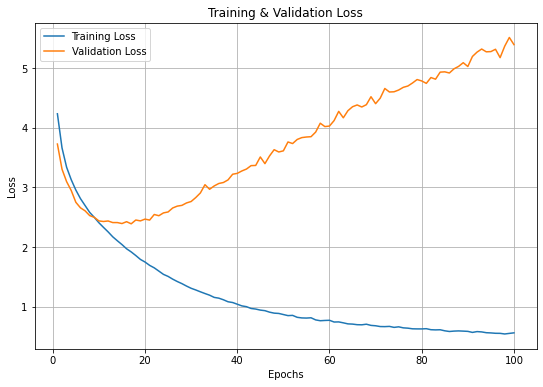

In [15]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
# plt.ylim(0, 0.4)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

> ## 5) Model Evaluate

* Loss & Accuracy

In [16]:
loss, accuracy = model.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 5.3775 - accuracy: 0.3572
Loss = 5.37753
Accuracy = 0.35720
